In [1]:
# Let's import our imports ;)
from telco_setup import telco_imports
telco_imports()


import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as m
from scipy import stats
from stat_tools import *
from sklearn.model_selection import train_test_split
import acquire
import prepare
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import lux
    


In [2]:
# import our imports ;)
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as m
from scipy import stats
from stat_tools import *
from sklearn.model_selection import train_test_split
import acquire
import prepare
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import lux

In [170]:
# I feel like it's all getting easier from here...
# Let's use the aquire file's get_telco_data to return a DataFrame for us
df = acquire.get_telco_data()

In [171]:
# Oughta see what's going on in there
df.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            7043 non-null   object 
 1   gender                 7043 non-null   object 
 2   senior_citizen         7043 non-null   int64  
 3   partner                7043 non-null   object 
 4   dependents             7043 non-null   object 
 5   tenure                 7043 non-null   int64  
 6   phone_service          7043 non-null   object 
 7   multiple_lines         7043 non-null   object 
 8   internet_service_type  7043 non-null   object 
 9   online_security        7043 non-null   object 
 10  online_backup          7043 non-null   object 
 11  device_protection      7043 non-null   object 
 12  tech_support           7043 non-null   object 
 13  streaming_tv           7043 non-null   object 
 14  streaming_movies       7043 non-null   object 
 15  cont

# First let's see what's going on in the univariate

- There are 7043 total records, all of which are non-null
  - `senior_citizen` and `tenure` are both integers and `monthly_charges` is a float
  - all other fields are string objects
    - This means things need to change around here if we're going to make it work

### `phone_service` - There are `6361` with phone service and `682` without
  - That's `90.32%` Yes and `9.68%` No

In [22]:
df.phone_service.value_counts(dropna=False, normalize=True)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<AxesSubplot:xlabel='Count', ylabel='phone_service'>

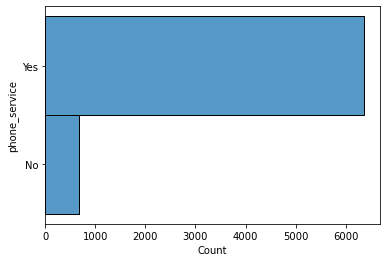

In [46]:
sns.histplot(y=df.phone_service)

In [47]:
for i in df:
    print(f'sns.histplot(y=df.{i})')

sns.histplot(y=df.customer_id)
sns.histplot(y=df.gender)
sns.histplot(y=df.senior_citizen)
sns.histplot(y=df.partner)
sns.histplot(y=df.dependents)
sns.histplot(y=df.tenure)
sns.histplot(y=df.phone_service)
sns.histplot(y=df.multiple_lines)
sns.histplot(y=df.internet_service_type)
sns.histplot(y=df.online_security)
sns.histplot(y=df.online_backup)
sns.histplot(y=df.device_protection)
sns.histplot(y=df.tech_support)
sns.histplot(y=df.streaming_tv)
sns.histplot(y=df.streaming_movies)
sns.histplot(y=df.contract_type)
sns.histplot(y=df.paperless_billing)
sns.histplot(y=df.payment_type)
sns.histplot(y=df.monthly_charges)
sns.histplot(y=df.total_charges)
sns.histplot(y=df.churn)


### `senior_citizen` - Only accounts for `1142` vs `5901`of customers that are not
  - About `16%` of customers are senior citizens `84%` are not

In [24]:
df.senior_citizen.value_counts(dropna=False, normalize=True)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<AxesSubplot:xlabel='Count', ylabel='senior_citizen'>

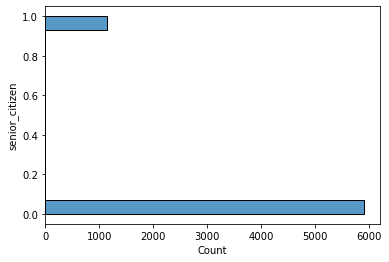

In [48]:
sns.histplot(y=df.senior_citizen)

###  `dependents` - We have `2110` vs. `4933` that are have no dependents
  - Right at a `30%/70%` split

In [37]:
df.dependents.value_counts(dropna=False, normalize=True)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<AxesSubplot:xlabel='Count', ylabel='dependents'>

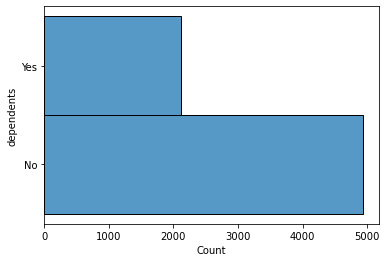

In [49]:
sns.histplot(y=df.dependents)

### `multiple_lines` - we have `3390: No`, `2971: Yes`, <br><br>and `682: No phone service`
  - The almost `10%` with no phone service might be their own group
  - It also means that `90%` of customers have phone service
  - We'll find out which people only have phone as well, and maybe pull them apart
  - Let's look into this more

In [50]:
df.multiple_lines.value_counts(dropna=False, normalize=True)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<AxesSubplot:xlabel='Count', ylabel='multiple_lines'>

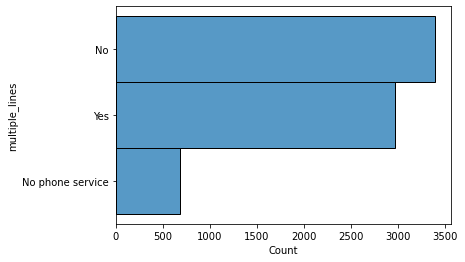

In [51]:
sns.histplot(y=df.multiple_lines)

<AxesSubplot:xlabel='Count', ylabel='gender'>

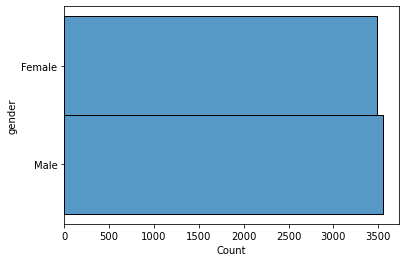

In [52]:
sns.histplot(y=df.gender)

<AxesSubplot:xlabel='Count', ylabel='partner'>

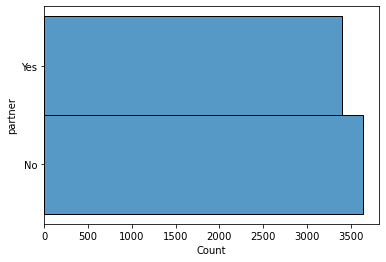

In [53]:
sns.histplot(y=df.partner)

<AxesSubplot:xlabel='Count', ylabel='tenure'>

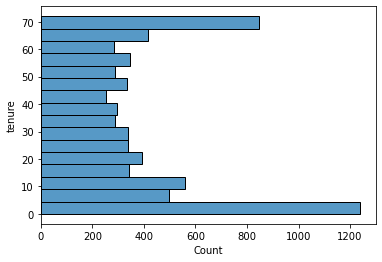

In [54]:
sns.histplot(y=df.tenure)

<AxesSubplot:xlabel='Count', ylabel='phone_service'>

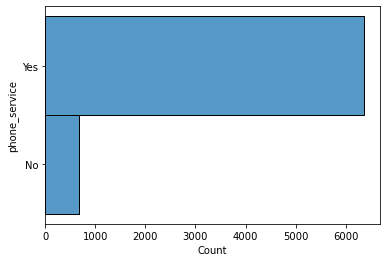

In [55]:
sns.histplot(y=df.phone_service)

<AxesSubplot:xlabel='Count', ylabel='internet_service_type'>

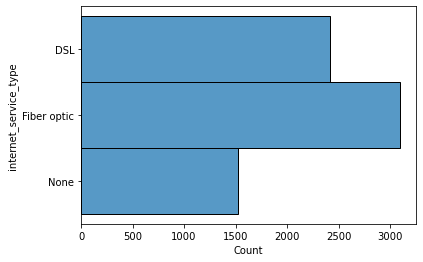

In [56]:
sns.histplot(y=df.internet_service_type)

<AxesSubplot:xlabel='Count', ylabel='online_security'>

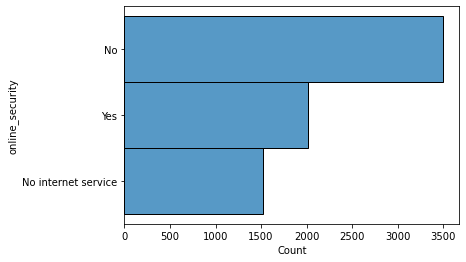

In [57]:
sns.histplot(y=df.online_security)

<AxesSubplot:xlabel='Count', ylabel='online_backup'>

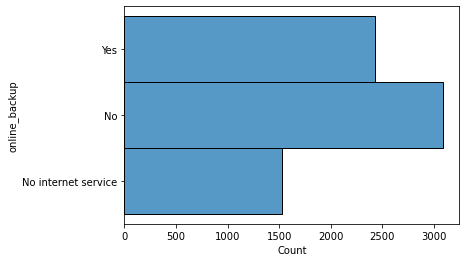

In [58]:
sns.histplot(y=df.online_backup)

<AxesSubplot:xlabel='Count', ylabel='device_protection'>

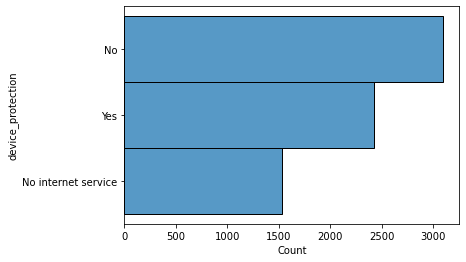

In [59]:
sns.histplot(y=df.device_protection)

<AxesSubplot:xlabel='Count', ylabel='tech_support'>

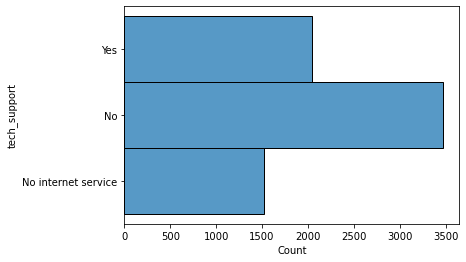

In [60]:
sns.histplot(y=df.tech_support)

<AxesSubplot:xlabel='Count', ylabel='streaming_tv'>

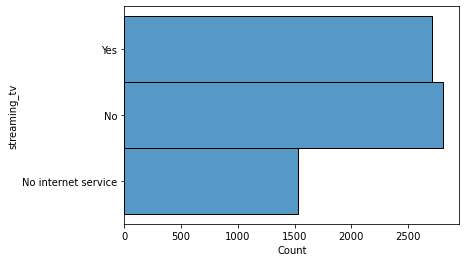

In [61]:
sns.histplot(y=df.streaming_tv)

<AxesSubplot:xlabel='Count', ylabel='streaming_movies'>

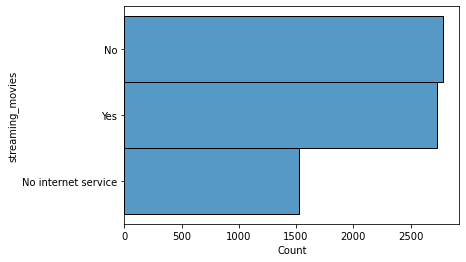

In [62]:
sns.histplot(y=df.streaming_movies)

<AxesSubplot:xlabel='Count', ylabel='contract_type'>

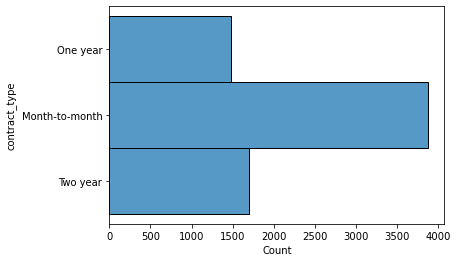

In [63]:
sns.histplot(y=df.contract_type)

<AxesSubplot:xlabel='Count', ylabel='paperless_billing'>

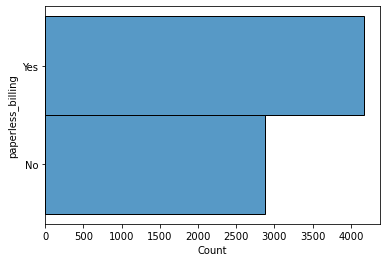

In [64]:
sns.histplot(y=df.paperless_billing)

<AxesSubplot:xlabel='Count', ylabel='payment_type'>

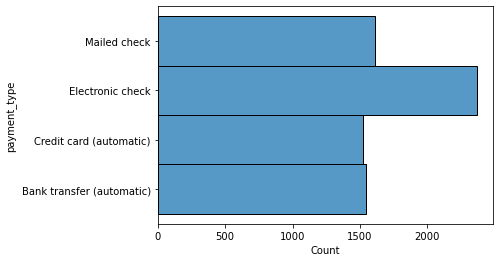

In [65]:
sns.histplot(y=df.payment_type)

<AxesSubplot:xlabel='monthly_charges', ylabel='Count'>

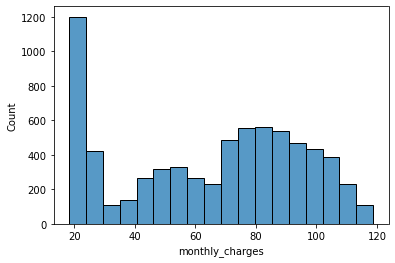

In [73]:
sns.histplot(x=df.monthly_charges)

In [176]:
df.total_charges = pd.to_numeric(df.total_charges, errors='coerce')

In [181]:
df.total_charges.isnull().value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [178]:
df['null_charges'] = pd.to_numeric(df['total_charges'], errors='coerce').isnull()

df['total_charges'][df['null_charges'] == True] = df['monthly_charges'][df['null_charges'] == True]

/var/folders/n7/p9r5pxl53g99g0h4q1_h50fr0000gn/T/ipykernel_19347/3673192903.py:3: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [180]:
df.null_charges.value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [80]:
df['total_charges'].loc[df.null_charges == True] = df.monthly_charges.loc[df.null_charges ==True]

/var/folders/n7/p9r5pxl53g99g0h4q1_h50fr0000gn/T/ipykernel_19347/913548743.py:1: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [183]:
df.total_charges.value_counts(dropna=False)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<AxesSubplot:xlabel='total_charges', ylabel='Count'>

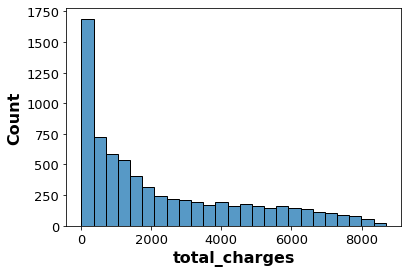

In [184]:
sns.histplot(df.total_charges)

<AxesSubplot:xlabel='Count', ylabel='churn'>

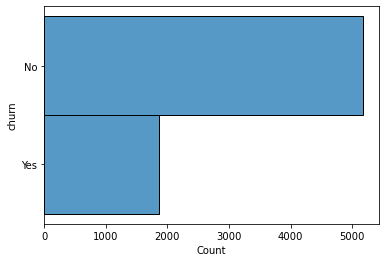

In [68]:
sns.histplot(y=df.churn)

### churn - is our target and within the dataset 1869 have churned vs 5174 that have not
  - Nearly 27% of all customers have churned... Let's look into that a bit more.

In [26]:
df.churn.value_counts(dropna=False, normalize=True)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

###  Let's look at how things relate to `Churn`

In [185]:
df.intent = ['churn']

In [186]:
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [187]:
vis = df
vis

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [188]:
print(vis.exported[0].to_matplotlib())

import matplotlib.pyplot as plt
plt.rcParams.update(
            {
                "axes.titlesize": 20,
                "axes.titleweight": "bold",
                "axes.labelweight": "bold",
                "axes.labelsize": 16,
                "legend.fontsize": 14,
                "legend.title_fontsize": 15,
                "xtick.labelsize": 13,
                "ytick.labelsize": 13,
            }
        )
import numpy as np
from math import nan
df = pd.DataFrame({'payment_type': {0: 'Bank transfer (automatic)', 1: 'Bank transfer (automatic)', 2: 'Credit card (automatic)', 3: 'Credit card (automatic)', 4: 'Electronic check', 5: 'Electronic check', 6: 'Mailed check', 7: 'Mailed check'}, 'churn': {0: 'No', 1: 'Yes', 2: 'No', 3: 'Yes', 4: 'No', 5: 'Yes', 6: 'No', 7: 'Yes'}, 'Record': {0: 1286, 1: 258, 2: 1290, 3: 232, 4: 1294, 5: 1071, 6: 1304, 7: 308}})
fig, ax = plt.subplots()
bars = df['payment_type']
measurements = df['Record']
ax.barh(['Bank transfer (automatic)', 'Credit card

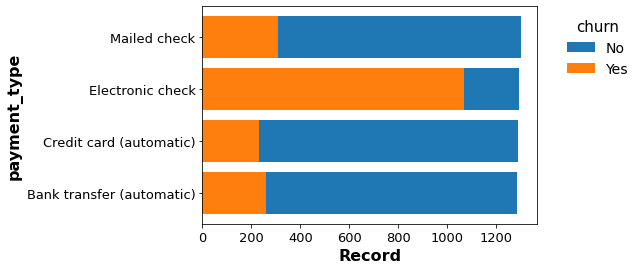

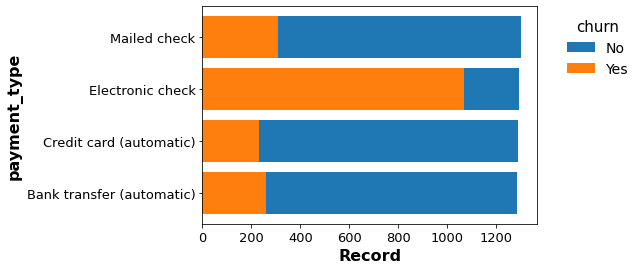

In [189]:
plt.rcParams.update(
            {
                "axes.titlesize": 20,
                "axes.titleweight": "bold",
                "axes.labelweight": "bold",
                "axes.labelsize": 16,
                "legend.fontsize": 14,
                "legend.title_fontsize": 15,
                "xtick.labelsize": 13,
                "ytick.labelsize": 13,
            }
        )
import numpy as np
from math import nan
df1 = pd.DataFrame({'payment_type': {0: 'Bank transfer (automatic)', 1: 'Bank transfer (automatic)', 2: 'Credit card (automatic)', 3: 'Credit card (automatic)', 4: 'Electronic check', 5: 'Electronic check', 6: 'Mailed check', 7: 'Mailed check'}, 'churn': {0: 'No', 1: 'Yes', 2: 'No', 3: 'Yes', 4: 'No', 5: 'Yes', 6: 'No', 7: 'Yes'}, 'Record': {0: 1286, 1: 258, 2: 1290, 3: 232, 4: 1294, 5: 1071, 6: 1304, 7: 308}})
fig, ax = plt.subplots()
bars = df1['payment_type']
measurements = df1['Record']
ax.barh(['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check'],[1286, 1290, 1294, 1304], label='No')
ax.barh(['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check'],[258, 232, 1071, 308], label='Yes')
ax.legend(title='churn', 
            bbox_to_anchor=(1.05, 1), 
            loc='upper left', 
            ncol=1, 
            frameon=False)
ax.set_xlabel('Record')
ax.set_ylabel('payment_type')

fig

In [190]:
df1

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

There are about 1300 people in each payment type that have not churned however, there are 232, 258, and 308 who have churned in CC(auto), Bank Transfer(auto) and Mailed Check respectively, while the Electronic Check category has over 1000 who have churned.

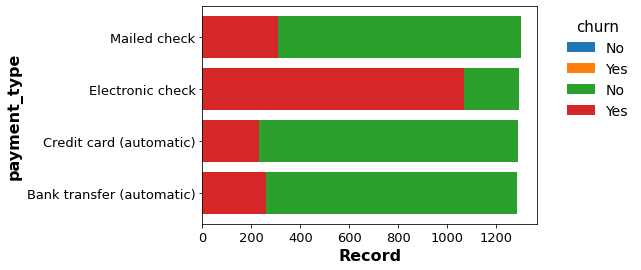

In [165]:
plt.rcParams.update(
            {
                "axes.titlesize": 20,
                "axes.titleweight": "bold",
                "axes.labelweight": "bold",
                "axes.labelsize": 16,
                "legend.fontsize": 14,
                "legend.title_fontsize": 15,
                "xtick.labelsize": 13,
                "ytick.labelsize": 13,
            }
        )
# import numpy as np
# from math import nan
df = pd.DataFrame({'payment_type': {0: 'Bank transfer (automatic)', 1: 'Bank transfer (automatic)', 2: 'Credit card (automatic)', 3: 'Credit card (automatic)', 4: 'Electronic check', 5: 'Electronic check', 6: 'Mailed check', 7: 'Mailed check'}, 'churn': {0: 'No', 1: 'Yes', 2: 'No', 3: 'Yes', 4: 'No', 5: 'Yes', 6: 'No', 7: 'Yes'}, 'Record': {0: 1286, 1: 258, 2: 1290, 3: 232, 4: 1294, 5: 1071, 6: 1304, 7: 308}})
# fig, ax = plt.subplots()
bars = df['payment_type']
measurements = df['Record']
ax.barh(['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check'],[1286, 1290, 1294, 1304], label='No')
ax.barh(['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check'],[258, 232, 1071, 308], label='Yes')
ax.legend(title='churn', 
            bbox_to_anchor=(1.05, 1), 
            loc='upper left', 
            ncol=1, 
            frameon=False)
ax.set_xlabel('Record')
ax.set_ylabel('payment_type')

fig

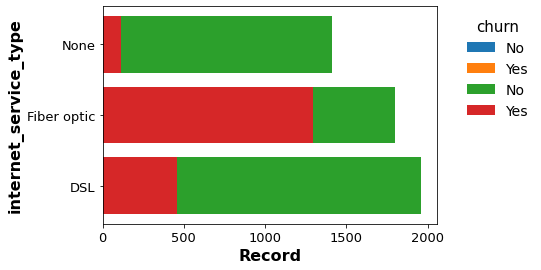

In [168]:
plt.rcParams.update(
            {
                "axes.titlesize": 20,
                "axes.titleweight": "bold",
                "axes.labelweight": "bold",
                "axes.labelsize": 16,
                "legend.fontsize": 14,
                "legend.title_fontsize": 15,
                "xtick.labelsize": 13,
                "ytick.labelsize": 13,
            }
        )
# import numpy as np
# from math import nan
df = pd.DataFrame({'internet_service_type': {0: 'DSL', 1: 'DSL', 2: 'Fiber optic', 3: 'Fiber optic', 4: 'None', 5: 'None'}, 'churn': {0: 'No', 1: 'Yes', 2: 'No', 3: 'Yes', 4: 'No', 5: 'Yes'}, 'Record': {0: 1962, 1: 459, 2: 1799, 3: 1297, 4: 1413, 5: 113}})
# fig, ax = plt.subplots()
bars = df['internet_service_type']
measurements = df['Record']
ax.barh(['DSL', 'Fiber optic', 'None'],[1962, 1799, 1413], label='No')
ax.barh(['DSL', 'Fiber optic', 'None'],[459, 1297, 113], label='Yes')
ax.legend(title='churn', 
            bbox_to_anchor=(1.05, 1), 
            loc='upper left', 
            ncol=1, 
            frameon=False)
ax.set_xlabel('Record')
ax.set_ylabel('internet_service_type')

fig

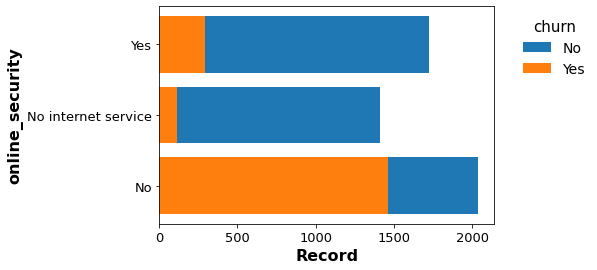

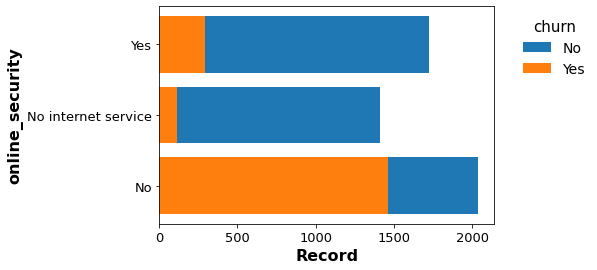

In [162]:
plt.rcParams.update(
            {
                "axes.titlesize": 20,
                "axes.titleweight": "bold",
                "axes.labelweight": "bold",
                "axes.labelsize": 16,
                "legend.fontsize": 14,
                "legend.title_fontsize": 15,
                "xtick.labelsize": 13,
                "ytick.labelsize": 13,
            }
        )
# import numpy as np
# from math import nan
df = pd.DataFrame({'online_security': {0: 'No', 1: 'No', 2: 'No internet service', 3: 'No internet service', 4: 'Yes', 5: 'Yes'}, 'churn': {0: 'No', 1: 'Yes', 2: 'No', 3: 'Yes', 4: 'No', 5: 'Yes'}, 'Record': {0: 2037, 1: 1461, 2: 1413, 3: 113, 4: 1724, 5: 295}})
fig, ax = plt.subplots()
bars = df['online_security']
measurements = df['Record']
ax.barh(['No', 'No internet service', 'Yes'],[2037, 1413, 1724], label='No')
ax.barh(['No', 'No internet service', 'Yes'],[1461, 113, 295], label='Yes')
ax.legend(title='churn', 
            bbox_to_anchor=(1.05, 1), 
            loc='upper left', 
            ncol=1, 
            frameon=False)
ax.set_xlabel('Record')
ax.set_ylabel('online_security')

fig

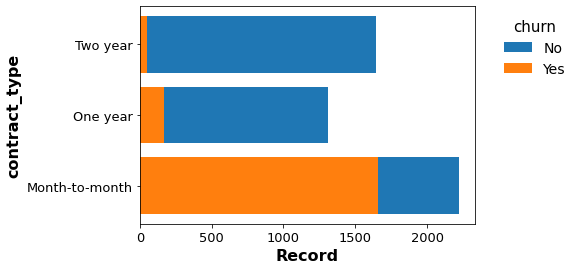

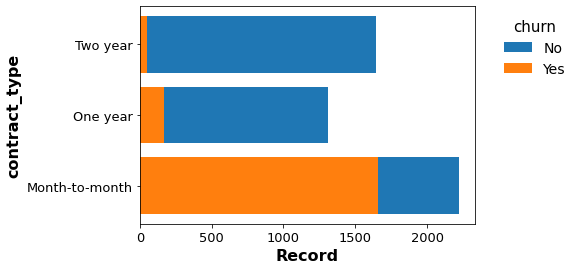

In [160]:
plt.rcParams.update(
            {
                "axes.titlesize": 20,
                "axes.titleweight": "bold",
                "axes.labelweight": "bold",
                "axes.labelsize": 16,
                "legend.fontsize": 14,
                "legend.title_fontsize": 15,
                "xtick.labelsize": 13,
                "ytick.labelsize": 13,
            }
        )
from math import nan
df = pd.DataFrame({'contract_type': {0: 'Month-to-month', 1: 'Month-to-month', 2: 'One year', 3: 'One year', 4: 'Two year', 5: 'Two year'}, 'churn': {0: 'No', 1: 'Yes', 2: 'No', 3: 'Yes', 4: 'No', 5: 'Yes'}, 'Record': {0: 2220, 1: 1655, 2: 1307, 3: 166, 4: 1647, 5: 48}})
fig, ax = plt.subplots()
bars = df['contract_type']
measurements = df['Record']
ax.barh(['Month-to-month', 'One year', 'Two year'],[2220, 1307, 1647], label='No')
ax.barh(['Month-to-month', 'One year', 'Two year'],[1655, 166, 48], label='Yes')
ax.legend(title='churn', 
            bbox_to_anchor=(1.05, 1), 
            loc='upper left', 
            ncol=1, 
            frameon=False)
ax.set_xlabel('Record')
ax.set_ylabel('contract_type')

fig
# Lets print out the histplot's for everything using the hue of churn


In [105]:
# Lets print out the histplot's for everything using the hue of churn
for i in df:
    print(f'sns.histplot(data=df, y="{i}", hue="churn")')

sns.histplot(data=df, y="customer_id", hue="churn")
sns.histplot(data=df, y="gender", hue="churn")
sns.histplot(data=df, y="senior_citizen", hue="churn")
sns.histplot(data=df, y="partner", hue="churn")
sns.histplot(data=df, y="dependents", hue="churn")
sns.histplot(data=df, y="tenure", hue="churn")
sns.histplot(data=df, y="phone_service", hue="churn")
sns.histplot(data=df, y="multiple_lines", hue="churn")
sns.histplot(data=df, y="internet_service_type", hue="churn")
sns.histplot(data=df, y="online_security", hue="churn")
sns.histplot(data=df, y="online_backup", hue="churn")
sns.histplot(data=df, y="device_protection", hue="churn")
sns.histplot(data=df, y="tech_support", hue="churn")
sns.histplot(data=df, y="streaming_tv", hue="churn")
sns.histplot(data=df, y="streaming_movies", hue="churn")
sns.histplot(data=df, y="contract_type", hue="churn")
sns.histplot(data=df, y="paperless_billing", hue="churn")
sns.histplot(data=df, y="payment_type", hue="churn")
sns.histplot(data=df, y="monthly_

<AxesSubplot:xlabel='Count', ylabel='gender'>

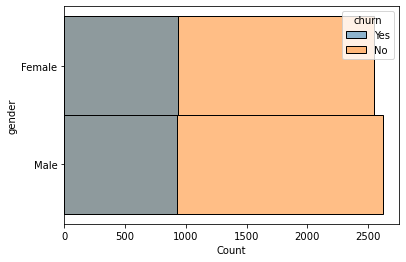

In [113]:
sns.histplot(data=df, y="gender", hue="churn", hue_order=['Yes', 'No'])

In [134]:
df.gender[df.churn == 'Yes'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [136]:
df.gender[df.churn == 'No'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<AxesSubplot:xlabel='Count', ylabel='senior_citizen'>

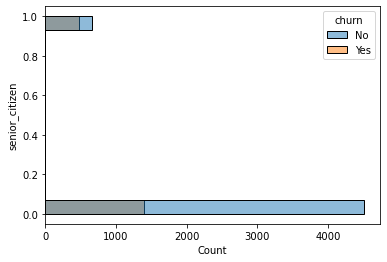

In [114]:
sns.histplot(data=df, y="senior_citizen", hue="churn")

<AxesSubplot:xlabel='Count', ylabel='partner'>

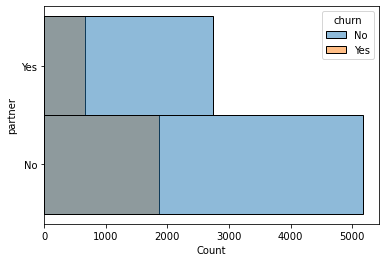

In [146]:
sns.histplot(data=df, y="partner", hue="churn", cumulative=True)

<AxesSubplot:xlabel='Count', ylabel='dependents'>

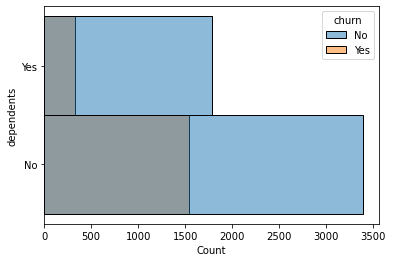

In [115]:
sns.histplot(data=df, y="dependents", hue="churn")

##  The longer the tenure, the lower percentage of churn

<AxesSubplot:xlabel='Count', ylabel='tenure'>

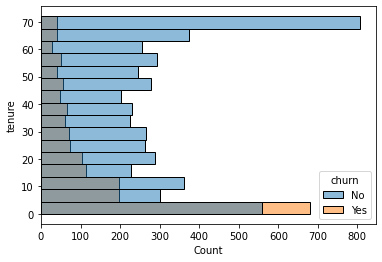

In [116]:
sns.histplot(data=df, y="tenure", hue="churn")

<AxesSubplot:xlabel='Count', ylabel='phone_service'>

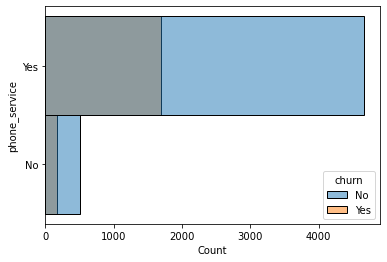

In [117]:
sns.histplot(data=df, y="phone_service", hue="churn")

<AxesSubplot:xlabel='Count', ylabel='multiple_lines'>

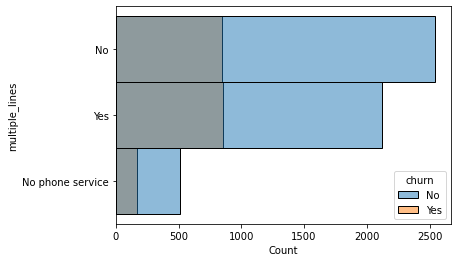

In [118]:
sns.histplot(data=df, y="multiple_lines", hue="churn")

<AxesSubplot:xlabel='Count', ylabel='internet_service_type'>

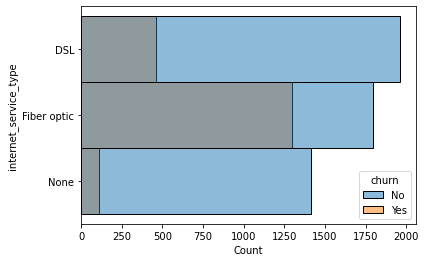

In [119]:
sns.histplot(data=df, y="internet_service_type", hue="churn")

<AxesSubplot:xlabel='Count', ylabel='online_security'>

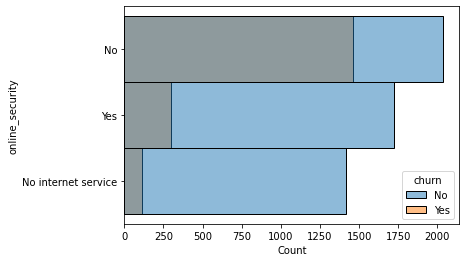

In [120]:
sns.histplot(data=df, y="online_security", hue="churn")

<AxesSubplot:xlabel='Count', ylabel='online_backup'>

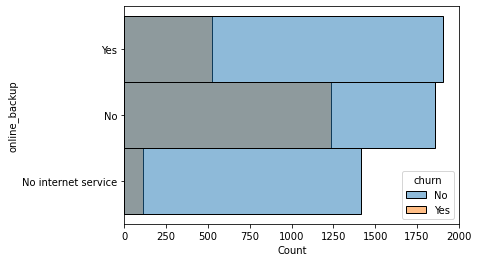

In [121]:
sns.histplot(data=df, y="online_backup", hue="churn")

<AxesSubplot:xlabel='Count', ylabel='device_protection'>

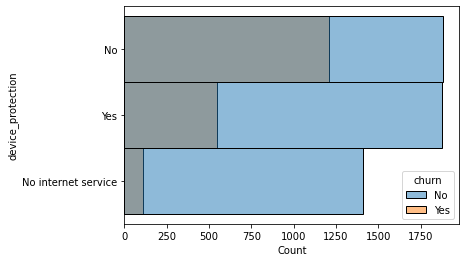

In [122]:
sns.histplot(data=df, y="device_protection", hue="churn")

<AxesSubplot:xlabel='Count', ylabel='tech_support'>

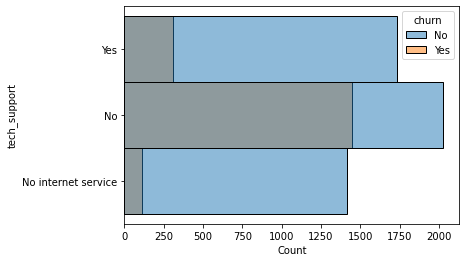

In [123]:
sns.histplot(data=df, y="tech_support", hue="churn")

<AxesSubplot:xlabel='Count', ylabel='streaming_tv'>

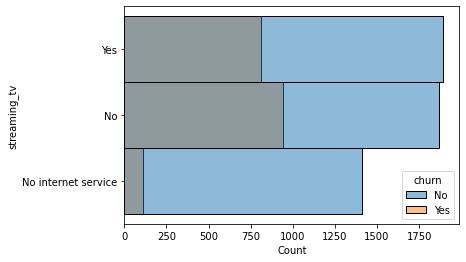

In [124]:
sns.histplot(data=df, y="streaming_tv", hue="churn")

<AxesSubplot:xlabel='Count', ylabel='streaming_movies'>

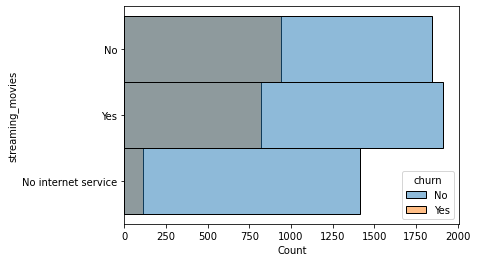

In [125]:
sns.histplot(data=df, y="streaming_movies", hue="churn")

<AxesSubplot:xlabel='Count', ylabel='contract_type'>

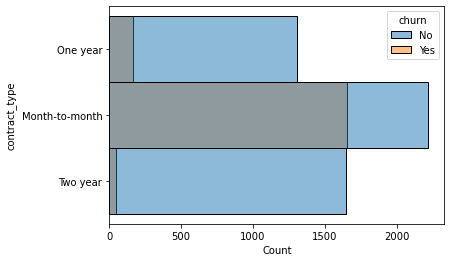

In [126]:
sns.histplot(data=df, y="contract_type", hue="churn")

<AxesSubplot:xlabel='Count', ylabel='paperless_billing'>

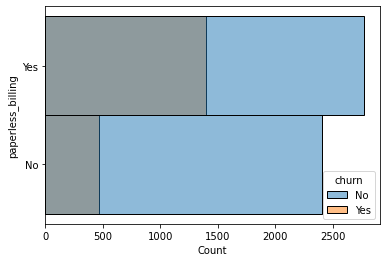

In [127]:
sns.histplot(data=df, y="paperless_billing", hue="churn")

### This electronic check option seems to be really out of whack...

<AxesSubplot:xlabel='Count', ylabel='payment_type'>

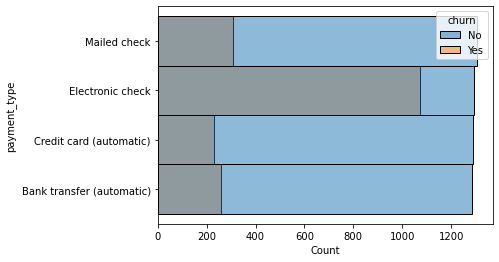

In [128]:
sns.histplot(data=df, y="payment_type", hue="churn")

### Higher monthly charges don't seem to make a difference, <br><br>in fact there seems to be less churn in the highest monthly charges groups.

<AxesSubplot:xlabel='monthly_charges', ylabel='Count'>

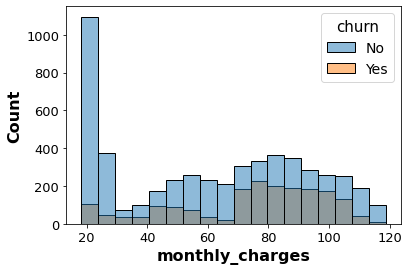

In [191]:
sns.histplot(data=df, x="monthly_charges", hue="churn")

<AxesSubplot:xlabel='Count', ylabel='total_charges'>

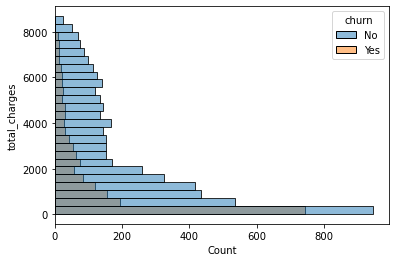

In [130]:
sns.histplot(data=df, y="total_charges", hue="churn")